In [1]:
import dynamo as dyn
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks

In [3]:
adata = dyn.read('../../data/toggle_switch/data_toggle.h5ad')

In [4]:
dyn.pp.recipe_monocle(adata)
dyn.tl.dynamics(adata)

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----? dynamo detects your data is size factor normalized and/or log transformed. If this is not right, plese set `normalized = False.
|-----> filtering cells...
|-----> 10007 cells passed basic filters.
|-----> filtering gene...
|-----> 2 genes passed basic filters.
|-----> calculating size factor..

d:\Anaconda\envs\celldancer\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: recipe_monocle is deprecated and will be removed in a future release. Please update your code to use the new replacement function.
  """Entry point for launching an IPython kernel.


|-----> [moments calculation] completed [35.5596s]


estimating gamma: 100%|██████████| 2/2 [00:00<00:00, 216.66it/s]


AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'highly_variable', 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'vel_params_names', 'dynamics'
    obsm: 'X_coord', 'coord', 'X_pca', 'X'
    varm: 'vel_params'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'connectivities', 'distances', 'moments_con'

In [5]:
dyn.tl.reduceDimension(adata, basis='umap')

|-----> retrieve data for non-linear dimension reduction...
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [UMAP] using X_umap with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [24.1807s]


In [7]:
dyn.tl.cell_velocities(adata)
dyn.vf.VectorField(adata,layer = 'spliced')
dyn.vf.VectorField(adata,basis='umap')
dyn.vf.topography(adata,basis='umap')

Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 1.0090%

|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.8485s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on `genes`, layer: spliced. 
        Vector field will be learned in the gene expression space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [4.6844s]
|-----> [VectorField] completed [5.1840s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space

d:\Anaconda\envs\celldancer\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
d:\Anaconda\envs\celldancer\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


AnnData object with n_obs × n_vars = 10010 × 2
    obs: 'leiden', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'control_point', 'inlier_prob', 'obs_vf_angle', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'highly_variable', 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'use_for_pca', 'ntr', 'use_for_dynamics', 'use_for_transition'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'vel_params_names', 'dynamics', 'pca_valid_ind', 'umap_fit', 'grid_velocity_umap', 'VecFld', 'VecFld_umap'
    obsm: 'X_coord', 'coord', 'X_pca', 'X', 'X_umap', 'velocity_umap', 'velocity_umap_SparseVFC', 'X_umap_SparseVFC'
    varm: 'vel_params'
    layers: 'spliced', 'unspliced', 'X_spliced', 'X_unspliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss

|-----> X shape: (10010, 2) V shape: (10010, 2)
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


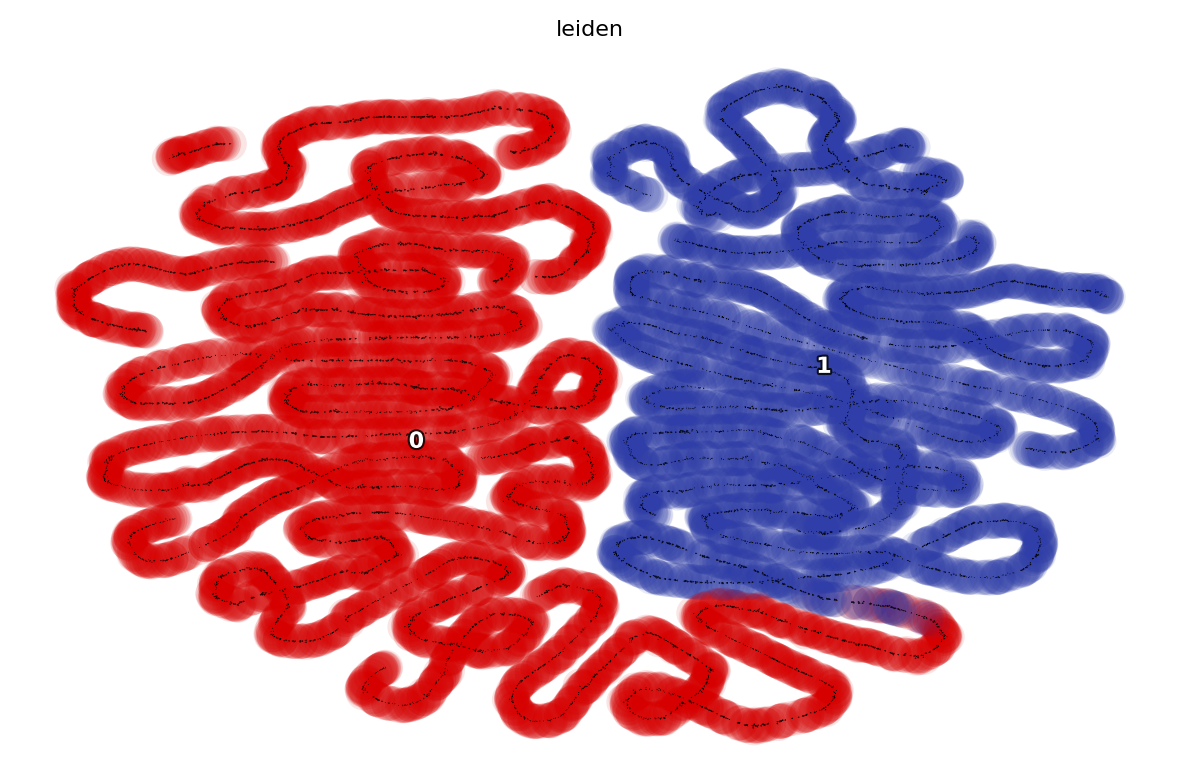

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


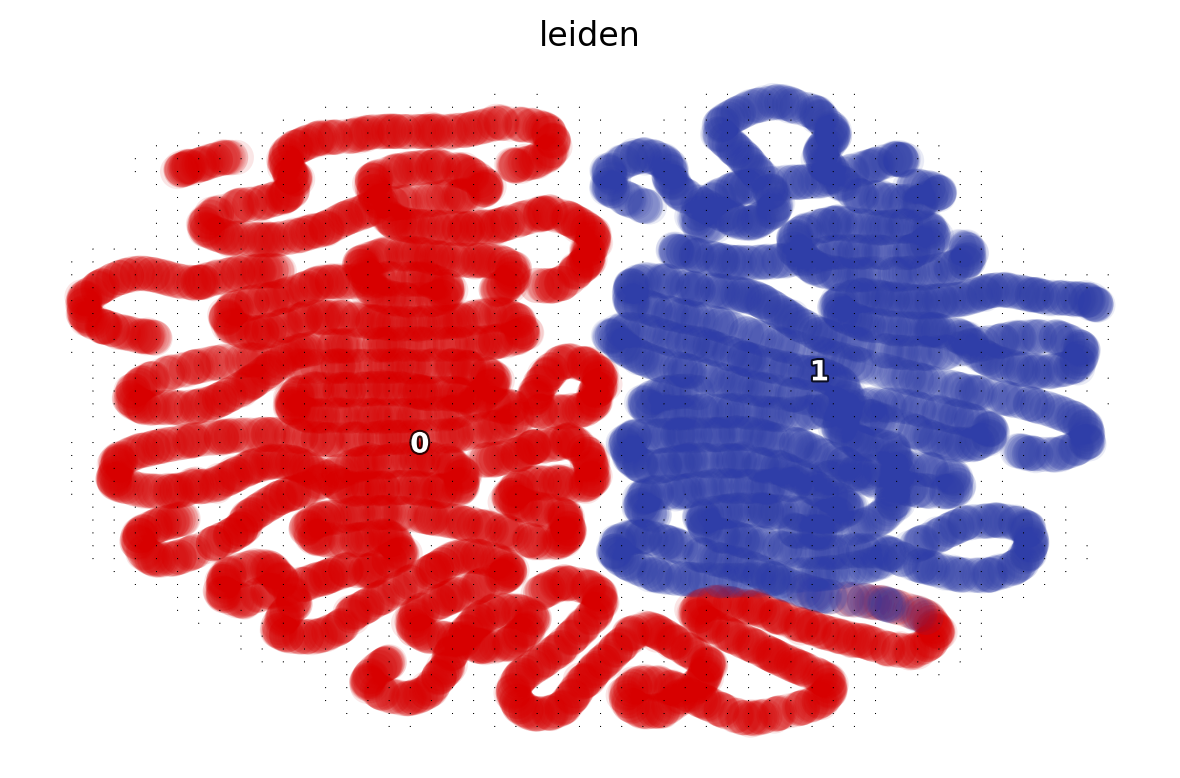

|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


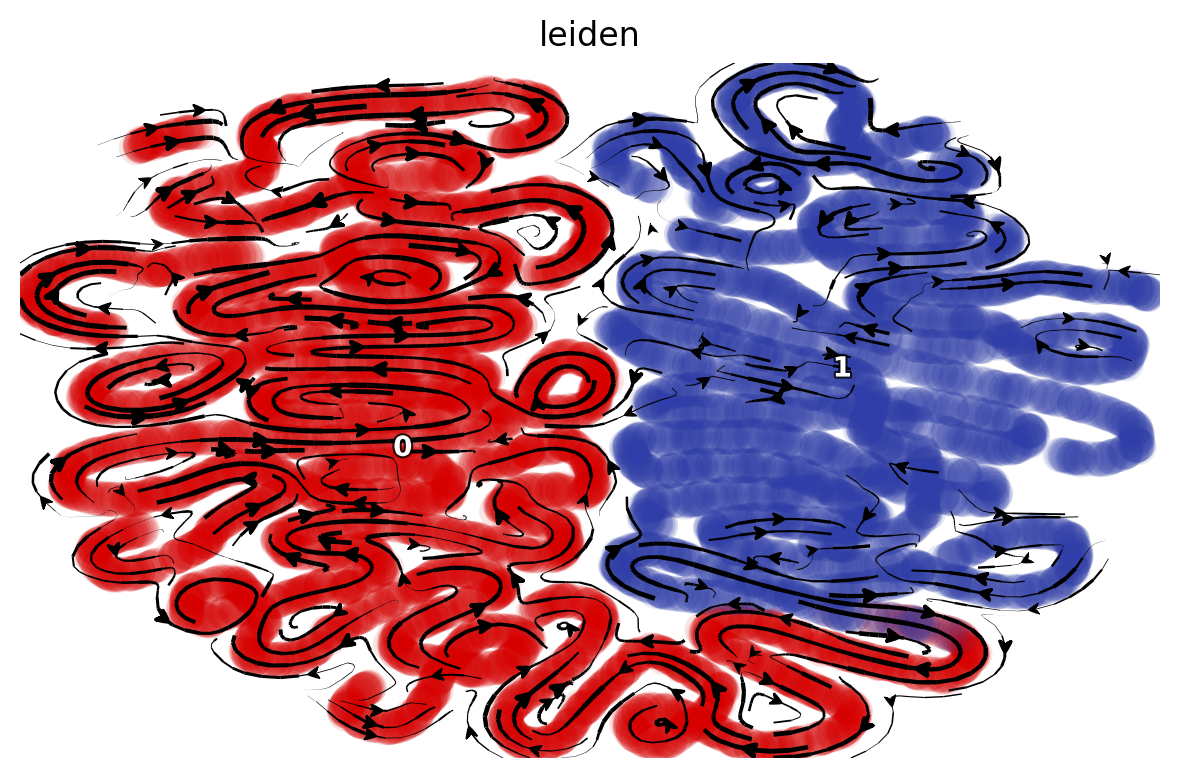

In [8]:
%matplotlib inline
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks
colors = 'leiden'
dyn.pl.cell_wise_vectors(adata, color=colors, ncols=3)
dyn.pl.grid_vectors(adata, color=colors, ncols=3)
dyn.pl.streamline_plot(adata, color=colors, ncols=3)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [7.8002s]
|-----------> current cosine correlation between input velocities and learned velocities is less than 0.6. Make a 1-th vector field reconstruction trial.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> [SparseVFC] completed [4.7941s]
|-----------> current cosine correlation between input velocities and learned velocities is le

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\plot\topography.py:561: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x000002A88649C908>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=5,
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\plot\topography.py:561: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x000002A8FB061648>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=5,
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\dynamo\plot\topography.py:561: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x000002A88237DA88>).  Matplotlib is ignoring the e

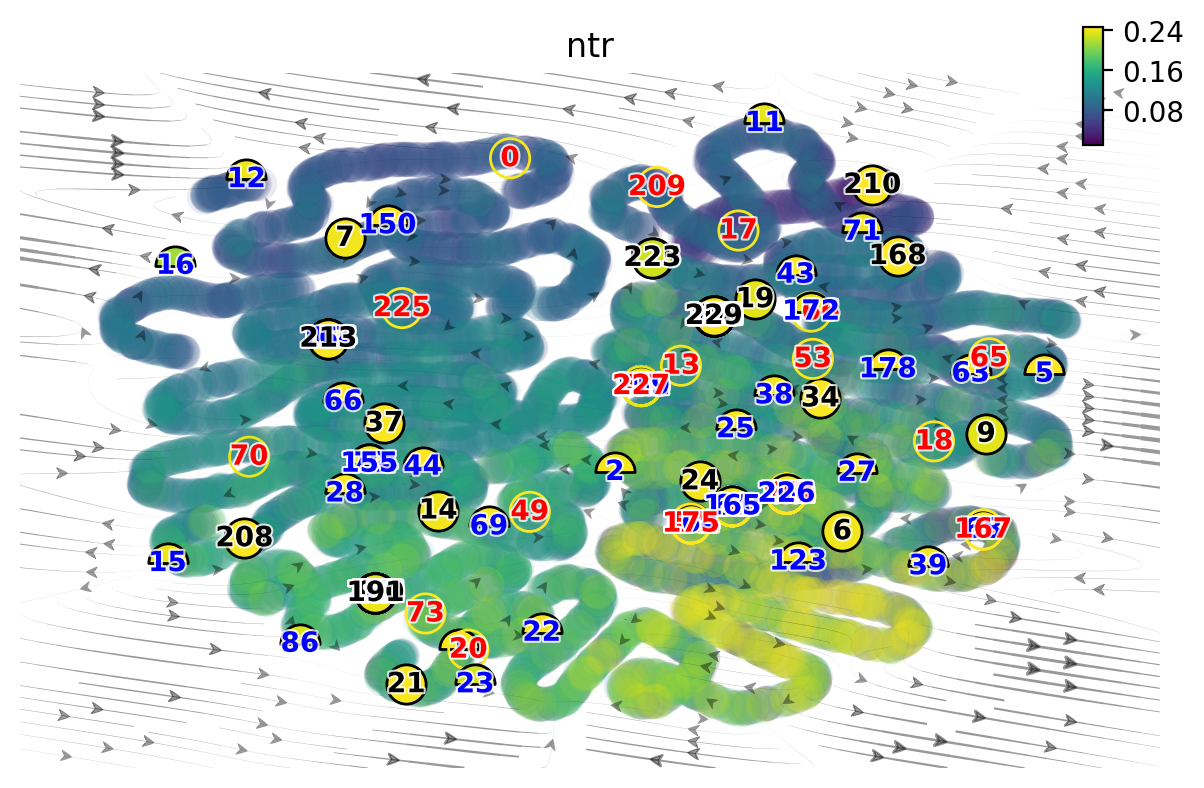

In [9]:
dyn.vf.VectorField(adata, basis='umap')
dyn.pl.topography(adata)